### 1. 数据预处理

### 导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 导入数据集

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values

### 将类别数据数字化

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [5]:
X[:5, :]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

### 躲避虚拟变量陷阱

In [6]:
X = X[: , 1:]

In [7]:
X[:5, :]

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05]])

### 拆分数据集为训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### 2. 在训练集上训练多元线性回归模型

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3. 在测试集上预测结果

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
print(y_pred)

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221056 116161.24230165  67851.69209676  98791.73374687
 113969.43533013 167921.06569552]


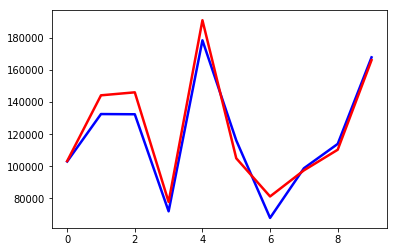

In [12]:
plt.plot(y_pred,lw=2.5,label="1st",color='blue')
plt.plot(Y_test,lw=2.5,label="2st",color='red')
plt.show()

In [13]:
x = np.arange(1,11,1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


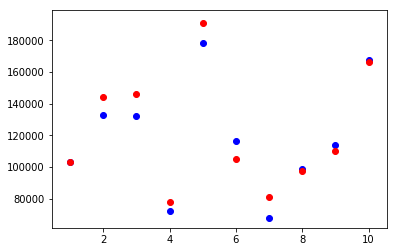

In [14]:
plt.scatter(x, y_pred,label="1st",color='blue')
plt.scatter(x, Y_test,label="2st",color='red')
plt.show()